1. import packages

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2. load the data

In [10]:
X = np.load('X.npy')  # Feature data (images of digits)
Y = np.load('y.npy')  # Labels (corresponding digits)


3. preprocessing of the data

In [13]:
# Normalize the features to a range of 0-1
X = X / 255.0

# Reshape the data (since images are 20x20 pixels with 1 channel)
X = X.reshape(X.shape[0], 20, 20, 1)

# Check the shape of the data
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (5000, 20, 20, 1)
Y shape: (5000, 1)


4. split the data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training data shape:", X_train.shape, Y_train.shape)
print("Testing data shape:", X_test.shape, Y_test.shape)


Training data shape: (4000, 20, 20, 1) (4000, 1)
Testing data shape: (1000, 20, 20, 1) (1000, 1)


5. Build the CNN model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output before passing to Dense layer
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 18, 18, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

6. Train the model

In [18]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0969 - loss: 2.3031 - val_accuracy: 0.0810 - val_loss: 2.3033
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0985 - loss: 2.3025 - val_accuracy: 0.0810 - val_loss: 2.3038
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1057 - loss: 2.3026 - val_accuracy: 0.0850 - val_loss: 2.3045
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1021 - loss: 2.3024 - val_accuracy: 0.0810 - val_loss: 2.3049
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0810 - val_loss: 2.3047
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1048 - loss: 2.3024 - val_accuracy: 0.0810 - val_loss: 2.3051
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.0810 - val_loss: 2.3051
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0929 - loss: 2.3030 - val_accu

Evaluate the agent

In [19]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_acc}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0760 - loss: 2.3056
Test Accuracy: 0.08100000023841858


Visualize the results to check agent's performance

In [27]:
%matplotlib inline


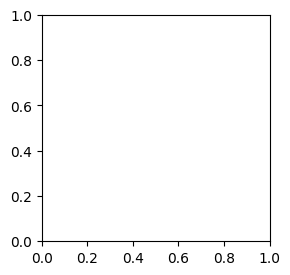

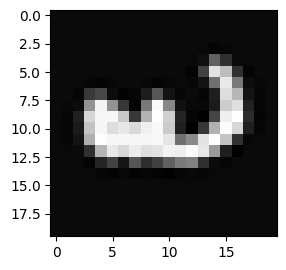

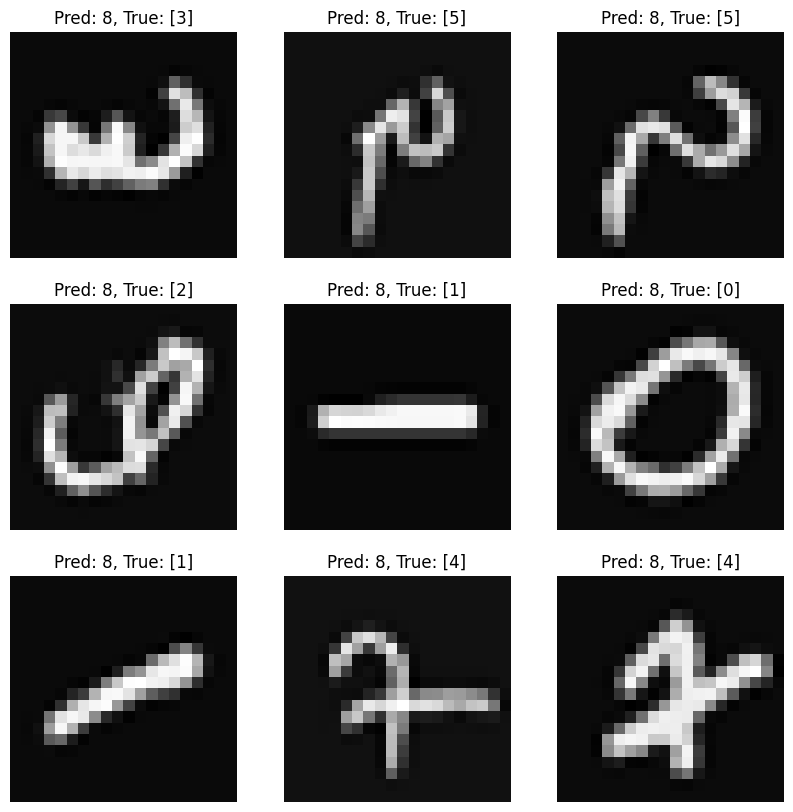

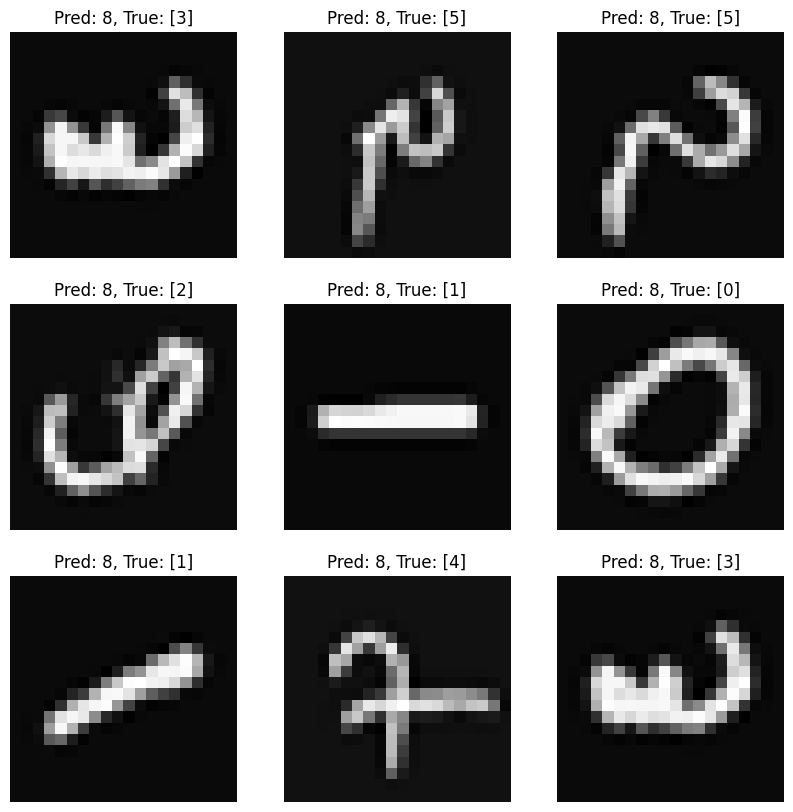

In [28]:
plt.imshow(X_test[0].reshape(20, 20), cmap='gray')
plt.title(f"Pred: {np.argmax(predictions[0])}, True: {Y_test[0]}")
plt.axis('off')
plt.show()


In [29]:
predictions = model.predict(X_test)
print(f"Predicted label: {np.argmax(predictions[0])}")
print(f"Actual label: {Y_test[0]}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted label: 8
Actual label: [3]


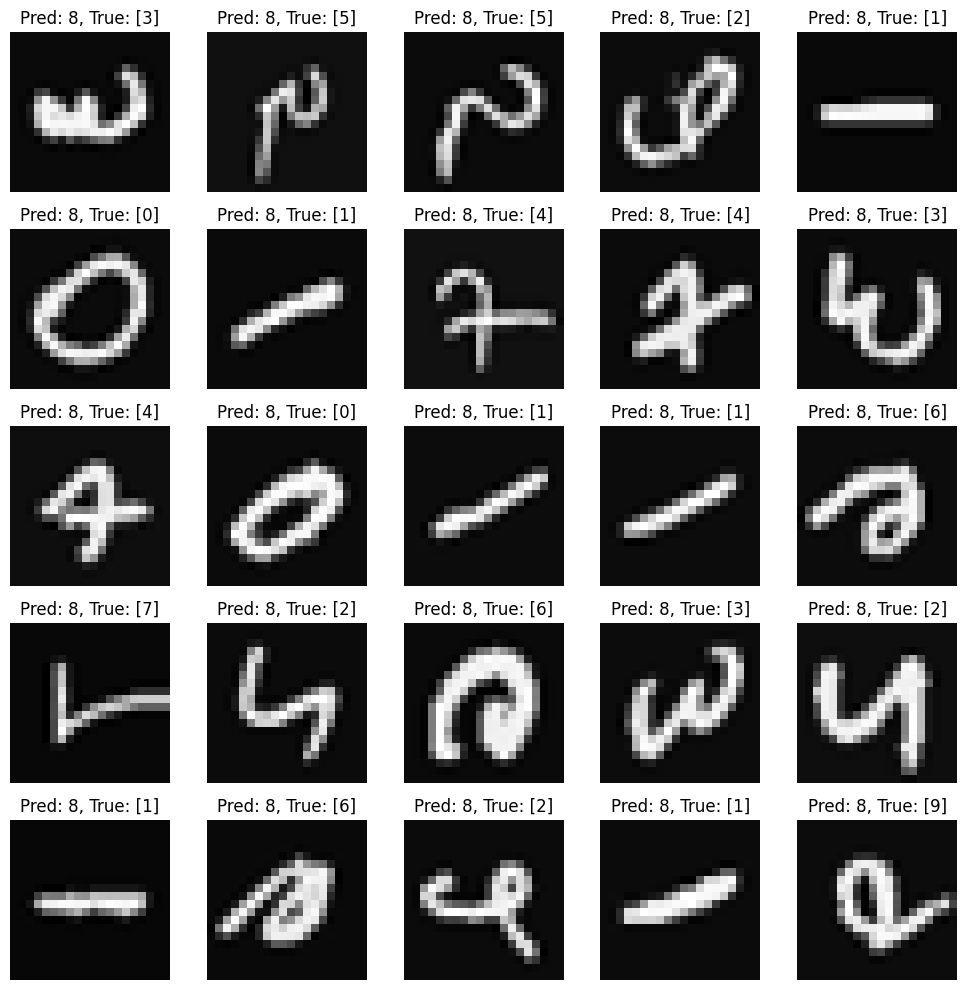

In [32]:
# Display incorrect predictions
plt.figure(figsize=(10, 10))
incorrect_indices = [i for i in range(len(X_test)) if np.argmax(predictions[i]) != Y_test[i]]

# Visualize up to 25 incorrect predictions
for idx, i in enumerate(incorrect_indices[:25]):  # Show only the first 25 incorrect predictions
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_test[i].reshape(20, 20), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}, True: {Y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
